# Requirements

## Libraries

In [ ]:
import os
from tqdm import tqdm
import cv2

from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

import shutil

import os,glob
from os import listdir,makedirs
from os.path import isfile,join

## Mount the G Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Ensure Tensorflow version 1.15.2 is selected

In [ ]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

1.15.2


## Clone the stylegan.git

In [ ]:
!git clone https://github.com/NVlabs/stylegan.git
!ls /content/stylegan/

fatal: destination path 'stylegan' already exists and is not an empty directory.
config.py	     LICENSE.txt	    README.md		 train.py
dataset_tool.py      metrics		    run_metrics.py
dnnlib		     pretrained_example.py  stylegan-teaser.png
generate_figures.py  __pycache__	    training


In [ ]:
# Add stylegan folder to python

import sys
sys.path.insert(0, "/content/stylegan")
import dnnlib

## Extract the custom dataset

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/CSC 676 - Computer Vision/GAN Project/Notebooks/Dataset/anime.zip' -d '/content/CData/'

In [ ]:
_, _, files = next(os.walk("/content/CData"))
file_count = len(files)
file_count

# Pre-processing

In [ ]:
# resize all the images

path = '/content/CData/'
img = '/content/img/'

for filename in tqdm(img_set,desc ='reading images ...'):
  image = PIL.Image.open(path+filename)
  image = image.resize((64,64))
  image.save(img+filename, image.format)

reading images ...: 100%|██████████| 19000/19000 [00:08<00:00, 2154.56it/s]


In [ ]:
_, _, files = next(os.walk("/content/img"))
file_count = len(files)
file_count

19000

In [ ]:
# Covert to tfrecords
!python /content/stylegan/dataset_tool.py create_from_images '/content/stylegan/datasets/custom-dataset' '/content/img'




Loading images from "/content/img"
Creating dataset "/content/stylegan/datasets/custom-dataset"



/content/stylegan/dataset_tool.py:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 19000 images.


# Training

## Update train.py

In [ ]:
# Replace line no 37 below # Dataset. 
# FROM desc += '-ffhq'; dataset = EasyDict(tfrecord_dir='ffhq'); train.mirror_augment = True
# TO desc += '-PATH of YOUR CUSTOM DATASET'= EasyDict(tfrecord_dir='PATH of YOUR CUSTOM DATASET'); train.mirror_augment = True 

In [ ]:
# Uncomment line number 46 below Number of GPUs. and comment line number 49
# Line number 52, train.total_kimg = 25000 is recommended for complete GAN training of 1024x1024 resolution image.
# I have set it to 3500. Training will stop after this much iterations

Go to the link [networks – Google Drive](https://drive.google.com/drive/folders/1MASQyN5m0voPcx7-9K0r5gObhvvPups7) you will see a file karras2019stylegan-ffhq1024x1024.pkl

We need to get [inception_v3_features.pkl](https://drive.google.com/file/d/1MzTY44rLToO5APn8TZmfR7_ENSe5aZUn/view?usp=sharing)

Now go to the path under stylegan/metrics and open python file frechet_inception_distance.py.  We need to do a small change here in line number 29 like below:

In [ ]:
# inception = misc.load_pkl('https://drive.google.com/uc?id=1MzTY44rLToO5APn8TZmfR7_ENSe5aZUn') # inception_v3_features.pkl

# inception = misc.load_pkl(''YOUR G-Drive inception-v3_features.pkl LINK url') # inception_v3_features.pkl

In [ ]:
# delete all files ending in 'jpg'

for fname in os.listdir('/content'):
    if fname.endswith("jpg"):
        os.remove(os.path.join('/content', fname))

In [ ]:
!python /content/stylegan/train.py 
# (! nohup python /content/stylegan/train.py if you want it to run in the background and you do not wish to see the progress in your terminal directly.
# Do note this will take a lot of time depending on the configurations mentioned above) 




Creating the run dir: results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu
Copying files to the run dir
dnnlib: Running training.training_loop.training_loop() on localhost...



Streaming data using training.dataset.TFRecordDataset...


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.
Dataset shape = [3, 64, 64]
Dynamic range = [0, 255]
Label size    = 0
Constructing networks...







G                           Params    OutputShape       Weight

In [ ]:
# zip folder

!zip -r '/content/results.zip' '/content/results/00004-sgan-/'

# View Images

In [ ]:
# real images

cv2_imshow(cv2.imread('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/reals.png'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# initial iterations

cv2_imshow(cv2.imread('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes000000.png'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# final 3500 iterations

cv2_imshow(cv2.imread('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes003500.png'))

Output hidden; open in https://colab.research.google.com to view.

## View a single image

In [ ]:
img_first = cv2.imread('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes000000.png')
img_last = cv2.imread('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes003500.png')

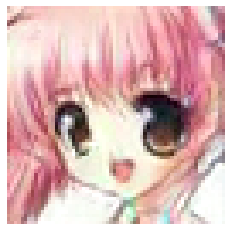

In [ ]:
plt.imshow(cv2.cvtColor(img_last[:64,:64], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

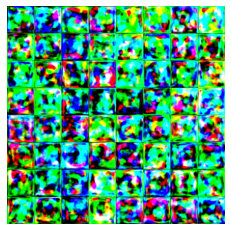

In [ ]:
plt.imshow(cv2.cvtColor(img_first[:512,:512], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

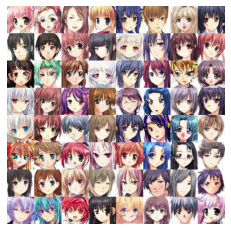

In [ ]:
plt.imshow(cv2.cvtColor(img_last[:512,:512], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Evaluating quality (FID)

## Run metric script

FID = 39.4008

In [ ]:
!python /content/stylegan/run_metrics.py 

In [ ]:
# zip folder for saving

!zip -r '/content/metrics.zip' '/content/results/00007-run_metrics.run_pickle-fid50k-1gpu'

# Save Results Folder

In [ ]:
# zip folder for saving

!zip -r '/content/results.zip' '/content/results'

# Using pre-trained weights

## Requirements

In [ ]:
# remove unnecessary folders
#!rm -rf '/content/results'

In [ ]:
# Load pre-tained weights results

!unzip '/content/drive/MyDrive/Colab Notebooks/CSC 676 - Computer Vision/GAN Project/Notebooks/Dataset/results.zip' -d '/content/results/'

Archive:  /content/drive/MyDrive/Colab Notebooks/CSC 676 - Computer Vision/GAN Project/Notebooks/Dataset/results.zip
   creating: /content/results/00000-sgan-/content/
   creating: /content/results/00000-sgan-/content/stylegan/
   creating: /content/results/00000-sgan-/content/stylegan/datasets/
   creating: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/
 extracting: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/_finished.txt  
  inflating: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/config.txt  
  inflating: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes000000.png  
  inflating: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes000140.png  
  inflating: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/log.txt  
  inflating: /content/results/00000-sgan-/content/stylegan/datasets/custom-dataset-1gpu/network-sna

In [ ]:
# cv2_imshow(cv2.imread('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/fakes001042.png'))

# Generate Image

## Generate Function

In [ ]:
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

"""Minimal script for generating an image using pre-trained StyleGAN generator."""

import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

def main():
    # Initialize TensorFlow.
    tflib.init_tf()

    # Load pre-trained network.
    url = '/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/network-final.pkl' # custom pkl
    with open(url,'rb') as f:
        _G, _D, Gs = pickle.load(f)
        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

    # Print network details.
    Gs.print_layers()

    # Pick latent vector.
    rnd = np.random.RandomState()
    

    latents = rnd.randn(1, Gs.input_shape[1])

    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    # Save image.
    os.makedirs(config.result_dir, exist_ok=True)
    png_filename = os.path.join(config.result_dir, f'/content/example.png')
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

if __name__ == "__main__":
    main()



Gs                          Params    OutputShape       WeightShape     
---                         ---       ---               ---             
latents_in                  -         (?, 512)          -               
labels_in                   -         (?, 0)            -               
lod                         -         ()                -               
dlatent_avg                 -         (512,)            -               
G_mapping/latents_in        -         (?, 512)          -               
G_mapping/labels_in         -         (?, 0)            -               
G_mapping/PixelNorm         -         (?, 512)          -               
G_mapping/Dense0            262656    (?, 512)          (512, 512)      
G_mapping/Dense1            262656    (?, 512)          (512, 512)      
G_mapping/Dense2            262656    (?, 512)          (512, 512)      
G_mapping/Dense3            262656    (?, 512)          (512, 512)      
G_mapping/Dense4            262656    (?, 512)    

NameError: ignored

## View Generated Images

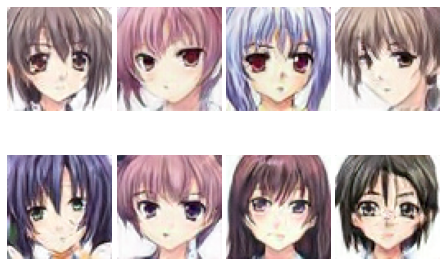

In [ ]:
plt.subplot(241), plt.imshow(cv2.cvtColor(cv2.imread('/content/example1.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(242), plt.imshow(cv2.cvtColor(cv2.imread('/content/example2.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(243), plt.imshow(cv2.cvtColor(cv2.imread('/content/example3.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(244), plt.imshow(cv2.cvtColor(cv2.imread('/content/example4.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(245), plt.imshow(cv2.cvtColor(cv2.imread('/content/example5.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(246), plt.imshow(cv2.cvtColor(cv2.imread('/content/example6.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(247), plt.imshow(cv2.cvtColor(cv2.imread('/content/example7.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(248), plt.imshow(cv2.cvtColor(cv2.imread('/content/example8.png'), cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplots_adjust(wspace=0.05, hspace=0.05, top=1, bottom=0, left=0,
                    right=1)

plt.show()

# Generate Figures

In [ ]:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=8)
_Gs_cache = dict()

In [ ]:
def load_Gs(url):
    if url not in _Gs_cache:
        with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
            _G, _D, Gs = pickle.load(f)
        _Gs_cache[url] = Gs
    return _Gs_cache[url]

In [ ]:
#----------------------------------------------------------------------------
# Figures 2, 3, 10, 11, 12: Multi-resolution grid of uncurated result images.

def draw_uncurated_result_figure(png, Gs, cx, cy, cw, ch, rows, lods, seed):
    print(png)
    latents = np.random.RandomState(seed).randn(sum(rows * 2**lod for lod in lods), Gs.input_shape[1])
    images = Gs.run(latents, None, **synthesis_kwargs) # [seed, y, x, rgb]

    canvas = PIL.Image.new('RGB', (sum(cw // 2**lod for lod in lods), ch * rows), 'white')
    image_iter = iter(list(images))
    for col, lod in enumerate(lods):
        for row in range(rows * 2**lod):
            image = PIL.Image.fromarray(next(image_iter), 'RGB')
            image = image.crop((cx, cy, cx + cw, cy + ch))
            image = image.resize((cw // 2**lod, ch // 2**lod), PIL.Image.ANTIALIAS)
            canvas.paste(image, (sum(cw // 2**lod for lod in lods[:col]), row * ch // 2**lod))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 3: Style mixing.

def draw_style_mixing_figure(png, Gs, w, h, src_seeds, dst_seeds, style_ranges):
    print(png)
    src_latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in src_seeds)
    dst_latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in dst_seeds)
    src_dlatents = Gs.components.mapping.run(src_latents, None) # [seed, layer, component]
    dst_dlatents = Gs.components.mapping.run(dst_latents, None) # [seed, layer, component]
    src_images = Gs.components.synthesis.run(src_dlatents, randomize_noise=False, **synthesis_kwargs)
    dst_images = Gs.components.synthesis.run(dst_dlatents, randomize_noise=False, **synthesis_kwargs)

    canvas = PIL.Image.new('RGB', (w * (len(src_seeds) + 1), h * (len(dst_seeds) + 1)), 'white')
    for col, src_image in enumerate(list(src_images)):
        canvas.paste(PIL.Image.fromarray(src_image, 'RGB'), ((col + 1) * w, 0))
    for row, dst_image in enumerate(list(dst_images)):
        canvas.paste(PIL.Image.fromarray(dst_image, 'RGB'), (0, (row + 1) * h))
        row_dlatents = np.stack([dst_dlatents[row]] * len(src_seeds))
        row_dlatents[:, style_ranges[row]] = src_dlatents[:, style_ranges[row]]
        row_images = Gs.components.synthesis.run(row_dlatents, randomize_noise=False, **synthesis_kwargs)
        for col, image in enumerate(list(row_images)):
            canvas.paste(PIL.Image.fromarray(image, 'RGB'), ((col + 1) * w, (row + 1) * h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 4: Noise detail.

def draw_noise_detail_figure(png, Gs, w, h, num_samples, seeds):
    print(png)
    canvas = PIL.Image.new('RGB', (w * 3, h * len(seeds)), 'white')
    for row, seed in enumerate(seeds):
        latents = np.stack([np.random.RandomState(seed).randn(Gs.input_shape[1])] * num_samples)
        images = Gs.run(latents, None, truncation_psi=1, **synthesis_kwargs)
        canvas.paste(PIL.Image.fromarray(images[0], 'RGB'), (0, row * h))
        for i in range(4):
            crop = PIL.Image.fromarray(images[i + 1], 'RGB')
            crop = crop.crop((650, 180, 906, 436))
            crop = crop.resize((w//2, h//2), PIL.Image.NEAREST)
            canvas.paste(crop, (w + (i%2) * w//2, row * h + (i//2) * h//2))
        diff = np.std(np.mean(images, axis=3), axis=0) * 4
        diff = np.clip(diff + 0.5, 0, 255).astype(np.uint8)
        canvas.paste(PIL.Image.fromarray(diff, 'L'), (w * 2, row * h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 5: Noise components.

def draw_noise_components_figure(png, Gs, w, h, seeds, noise_ranges, flips):
    print(png)
    Gsc = Gs.clone()
    noise_vars = [var for name, var in Gsc.components.synthesis.vars.items() if name.startswith('noise')]
    noise_pairs = list(zip(noise_vars, tflib.run(noise_vars))) # [(var, val), ...]
    latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in seeds)
    all_images = []
    for noise_range in noise_ranges:
        tflib.set_vars({var: val * (1 if i in noise_range else 0) for i, (var, val) in enumerate(noise_pairs)})
        range_images = Gsc.run(latents, None, truncation_psi=1, randomize_noise=False, **synthesis_kwargs)
        range_images[flips, :, :] = range_images[flips, :, ::-1]
        all_images.append(list(range_images))

    canvas = PIL.Image.new('RGB', (w * 2, h * 2), 'white')
    for col, col_images in enumerate(zip(*all_images)):
        canvas.paste(PIL.Image.fromarray(col_images[0], 'RGB').crop((0, 0, w//2, h)), (col * w, 0))
        canvas.paste(PIL.Image.fromarray(col_images[1], 'RGB').crop((w//2, 0, w, h)), (col * w + w//2, 0))
        canvas.paste(PIL.Image.fromarray(col_images[2], 'RGB').crop((0, 0, w//2, h)), (col * w, h))
        canvas.paste(PIL.Image.fromarray(col_images[3], 'RGB').crop((w//2, 0, w, h)), (col * w + w//2, h))
    canvas.save(png)

#----------------------------------------------------------------------------
# Figure 8: Truncation trick.

def draw_truncation_trick_figure(png, Gs, w, h, seeds, psis):
    print(png)
    latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in seeds)
    dlatents = Gs.components.mapping.run(latents, None) # [seed, layer, component]
    dlatent_avg = Gs.get_var('dlatent_avg') # [component]

    canvas = PIL.Image.new('RGB', (w * len(psis), h * len(seeds)), 'white')
    for row, dlatent in enumerate(list(dlatents)):
        row_dlatents = (dlatent[np.newaxis] - dlatent_avg) * np.reshape(psis, [-1, 1, 1]) + dlatent_avg
        row_images = Gs.components.synthesis.run(row_dlatents, randomize_noise=False, **synthesis_kwargs)
        for col, image in enumerate(list(row_images)):
            canvas.paste(PIL.Image.fromarray(image, 'RGB'), (col * w, row * h))
    canvas.save(png)

In [ ]:
def draw_style_mixing_figure(png, Gs, w, h, src_seeds, dst_seeds, style_ranges):
    print(png)
    src_latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in src_seeds)
    dst_latents = np.stack(np.random.RandomState(seed).randn(Gs.input_shape[1]) for seed in dst_seeds)
    src_dlatents = Gs.components.mapping.run(src_latents, None) # [seed, layer, component]
    dst_dlatents = Gs.components.mapping.run(dst_latents, None) # [seed, layer, component]
    src_images = Gs.components.synthesis.run(src_dlatents, randomize_noise=False, **synthesis_kwargs)
    dst_images = Gs.components.synthesis.run(dst_dlatents, randomize_noise=False, **synthesis_kwargs)
    print(dst_dlatents.shape)

    canvas = PIL.Image.new('RGB', (w * (len(src_seeds) + 1), h * (len(dst_seeds) + 1)), 'white')
    for col, src_image in enumerate(list(src_images)):
        canvas.paste(PIL.Image.fromarray(src_image, 'RGB'), ((col + 1) * w, 0))
    for row, dst_image in enumerate(list(dst_images)):
        canvas.paste(PIL.Image.fromarray(dst_image, 'RGB'), (0, (row + 1) * h))
        row_dlatents = np.stack([dst_dlatents[row]] * len(src_seeds))
        #print(row_dlatents.shape)
        print(row)
        print(style_ranges[row])
        print(src_dlatents[:, style_ranges[row]])
  
        row_dlatents[:, style_ranges[row]] = src_dlatents[:, style_ranges[row]]
        row_images = Gs.components.synthesis.run(row_dlatents, randomize_noise=False, **synthesis_kwargs)
        for col, image in enumerate(list(row_images)):
            canvas.paste(PIL.Image.fromarray(image, 'RGB'), ((col + 1) * w, (row + 1) * h))
    canvas.save(png)

In [ ]:
def main():
    # Initialize TensorFlow.
    tflib.init_tf()

    # Load pre-trained network.
    url = '/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/network-final.pkl' # custom pkl
    with open(url,'rb') as f:
        _G, _D, Gs = pickle.load(f)
        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.
    _Gs_cache[url] = Gs
    # Print network details.
    Gs.print_layers()

    # Save image.
    os.makedirs(config.result_dir, exist_ok=True)
    draw_uncurated_result_figure(os.path.join(config.result_dir, 'figure02-uncurated-anime.png'), _Gs_cache[url], cx=0, cy=0, cw=64, ch=64, rows=3, lods=[0,1,2,2,3,3], seed=5)
    #draw_style_mixing_figure(os.path.join(config.result_dir, 'figure03-style-mixing2.png'), _Gs_cache[url] , w=64, h=64, src_seeds=[639,701,687], dst_seeds=[888,829,1898], style_ranges=[range(4,6)]*3)
    draw_style_mixing_figure(os.path.join(config.result_dir, 'style-mixing-figure.png'), _Gs_cache[url] , w=64, h=64, src_seeds=[639,701,687,615,2268], dst_seeds=[888,829,1898,1733,1614,845], style_ranges=[range(0,2)]*3+[range(4,6)]*2+[range(8,10)])
    draw_noise_detail_figure(os.path.join(config.result_dir, 'figure04-noise-detail.png'), load_Gs(url), w=64, h=64, num_samples=100, seeds=[1157,1012])
    draw_noise_components_figure(os.path.join(config.result_dir, 'figure05-noise-components.png'), load_Gs(url), w=64, h=64, seeds=[1967,1555], noise_ranges=[range(0, 10), range(0, 0), range(8, 10), range(0, 2)], flips=[1])
    draw_truncation_trick_figure(os.path.join(config.result_dir, 'figure08-truncation-trick.png'), load_Gs(url), w=64, h=64, seeds=[91,388], psis=[1, 0.7, 0.5, 0, -0.5, -1])
    #----------------------------------------------------------------------------

    
    #png_filename = os.path.join(config.result_dir, f'/content/example4.png')
    #PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

if __name__ == "__main__":
    main()


Gs                          Params    OutputShape       WeightShape     
---                         ---       ---               ---             
latents_in                  -         (?, 512)          -               
labels_in                   -         (?, 0)            -               
lod                         -         ()                -               
dlatent_avg                 -         (512,)            -               
G_mapping/latents_in        -         (?, 512)          -               
G_mapping/labels_in         -         (?, 0)            -               
G_mapping/PixelNorm         -         (?, 512)          -               
G_mapping/Dense0            262656    (?, 512)          (512, 512)      
G_mapping/Dense1            262656    (?, 512)          (512, 512)      
G_mapping/Dense2            262656    (?, 512)          (512, 512)      
G_mapping/Dense3            262656    (?, 512)          (512, 512)      
G_mapping/Dense4            262656    (?, 512)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


(6, 10, 512)
0
range(0, 2)
[[[ 0.23112217 -0.04194798  0.58552176 ... -0.10043744  0.2506529
   -0.0297017 ]
  [ 0.23112217 -0.04194798  0.58552176 ... -0.10043744  0.2506529
   -0.0297017 ]]

 [[-0.04710216 -0.07894883 -0.00280709 ... -0.0082038  -0.05788134
   -0.21802907]
  [-0.04710216 -0.07894883 -0.00280709 ... -0.0082038  -0.05788134
   -0.21802907]]

 [[-0.22497404  0.2503738   0.82836646 ...  0.00956854 -0.13227932
   -0.04600358]
  [-0.22497404  0.2503738   0.82836646 ...  0.00956854 -0.13227932
   -0.04600358]]

 [[-0.26472947 -0.14220928  0.01041736 ... -0.05608803 -0.19272433
   -0.10920189]
  [-0.26472947 -0.14220928  0.01041736 ... -0.05608803 -0.19272433
   -0.10920189]]

 [[-0.01694715 -0.07666068 -0.117709   ...  0.16477634 -0.17573628
   -0.02898951]
  [-0.01694715 -0.07666068 -0.117709   ...  0.16477634 -0.17573628
   -0.02898951]]]
1
range(0, 2)
[[[ 0.23112217 -0.04194798  0.58552176 ... -0.10043744  0.2506529
   -0.0297017 ]
  [ 0.23112217 -0.04194798  0.58552176 

## Results

In [ ]:
img = cv2.imread('/content/results/figure03-style-mixing1.png')
img2 = cv2.imread('/content/results/figure03-style-mixing2.png')
img3 = cv2.imread('/content/results/figure03-style-mixing3.png')
img_mixing = cv2.imread('/content/results/style-mixing-figure.png')
img_noise_detail = cv2.imread('/content/results/figure04-noise-detail.png')
img_noise_components = cv2.imread('figure05-noise-components.png')
img_truncation = cv2.imread('/content/results/figure08-truncation-trick.png')
img_curr = cv2.imread('/content/results/figure02-uncurated-anime.png')

### Style Mixing

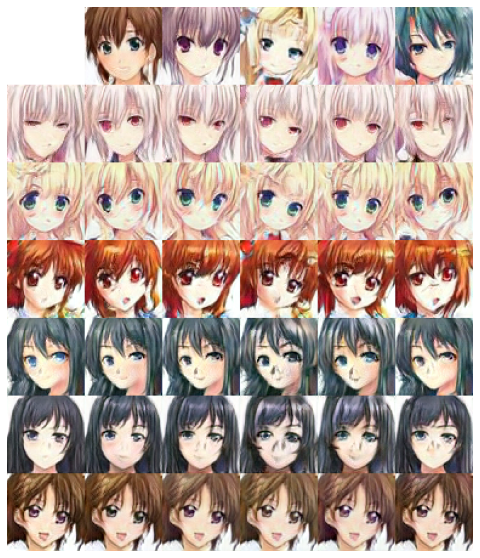

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_mixing, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

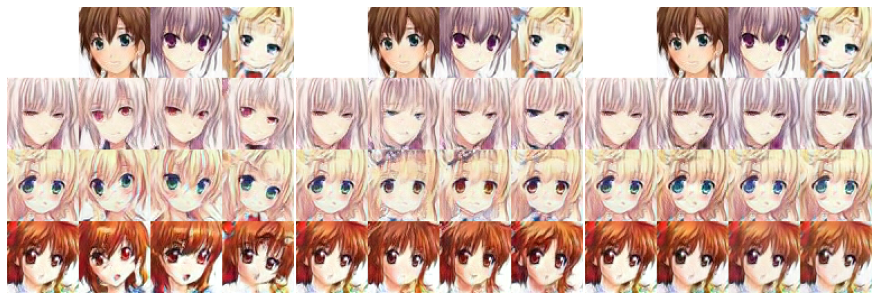

In [ ]:
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(132), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(133), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplots_adjust(wspace=0.01, hspace=0.01, top=2, bottom=0, left=0,
                    right=2)

plt.show()

### Noise

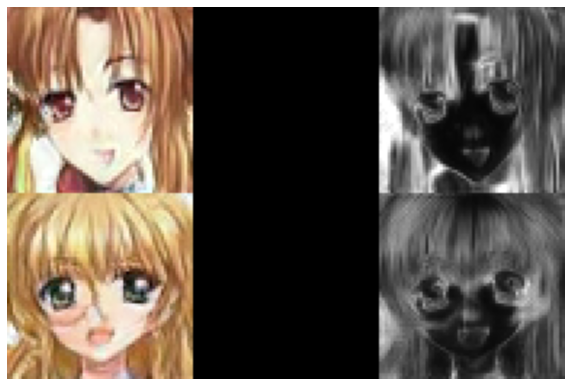

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_noise_detail, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Truncation Trick

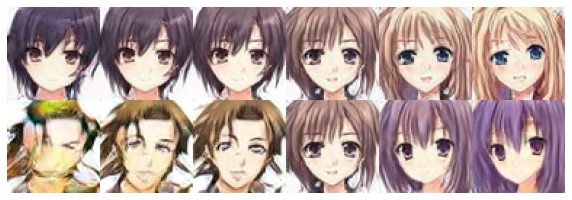

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_truncation, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Video

In [ ]:
# remove unnecessary folders
!rm -rf '/content/images'

## Move iteration results to images folder

In [ ]:
os.makedirs('/content/images')

for fname in sorted(os.listdir('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/')):
  if fname.endswith("png"):
    shutil.copy(os.path.join('/content/results/00004-sgan-/content/stylegan/datasets/custom-dataset-1gpu/', fname), os.path.join('/content/images/', fname))

## Take the first picture only by cropping all images

In [ ]:
lst_imgs = [i for i in os.listdir("/content/images/")]
 
# It creates a folder called ltl if does't exist
if not "crop" in os.listdir():
	os.mkdir("crop")
 
print(lst_imgs)
area = (0, 0, 64, 64)
for i in lst_imgs:
    img = PIL.Image.open('/content/images/' + i)
    img = img.crop(area)
    img.save("/content/crop/" + i[:-4] + ".png")

!rm /content/crop/reals.png # remove reals image

['fakes002565.png', 'fakes000922.png', 'fakes001964.png', 'reals.png', 'fakes001162.png', 'fakes000561.png', 'fakes003365.png', 'fakes001403.png', 'fakes002064.png', 'fakes000000.png', 'fakes003205.png', 'fakes001764.png', 'fakes003445.png', 'fakes002665.png', 'fakes003500.png', 'fakes000280.png', 'fakes001283.png', 'fakes001644.png', 'fakes002765.png', 'fakes000681.png', 'fakes001864.png', 'fakes002465.png', 'fakes003045.png', 'fakes002364.png', 'fakes000801.png', 'fakes000420.png', 'fakes003285.png', 'fakes002965.png', 'fakes002264.png', 'fakes001042.png', 'fakes002164.png', 'fakes001523.png', 'fakes003125.png', 'fakes000140.png', 'fakes002865.png']


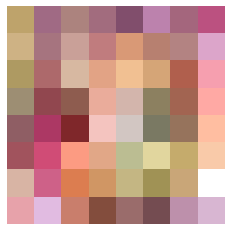

In [ ]:
# Check to see if we correctly extracted the first pic in each saved iteration

plt.imshow(cv2.cvtColor(cv2.imread('/content/crop/fakes000140.png'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Convert images to jpg

In [ ]:
path = '/content/crop' # Source Folder

os.mkdir("video")

dstpath = '/content/video' # Destination Folder

#try:
 #   makedirs(dstpath)
#except:
#    print ("Directory already exist, images will be written in same folder")
# Folder won't used
files = sorted(list(filter(lambda f: isfile(join(path,f)), listdir(path))))

#size = 500

for i,image in enumerate(files):
      img = cv2.imread(os.path.join(path,image))
      #print(files)
      #height, width, channels = img.shape
      #print(image,height, width)
      #print(i)
      cv2.imwrite("/content/video/"+str(100+i)+".jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

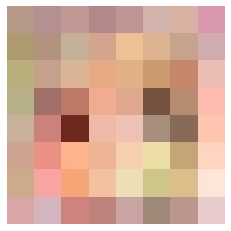

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread('/content/video/102.jpg'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Create video of our progression

In [ ]:
img_array = []
for filename in sorted(glob.glob('/content/video/*.jpg')):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('/content/project.avi',cv2.VideoWriter_fourcc(*'XVID'), 2, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()